<a href="https://colab.research.google.com/github/vanryuji/tensorflow/blob/master/transfer_learning/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/images/transfer_learning

In [2]:
!pip list | grep tensorflow

mesh-tensorflow          0.0.5                
tensorflow               1.14.0               
tensorflow-estimator     1.14.0               
tensorflow-hub           0.5.0                
tensorflow-metadata      0.13.0               
tensorflow-probability   0.7.0                


In [0]:
# from __future__ import absolute_import, division, print_function

import os
import tensorflow as tf
# import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Data preprocessing

In [4]:
zip_file = tf.keras.utils.get_file(origin="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip", 
                                   fname="cats_and_dogs_filtered.zip", 
                                   extract=True)
base_dir, _ = os.path.splitext(zip_file)

68608000/68606236 [==============================] - 1s 0us/step


In [8]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print ('Total training cat images:', len(os.listdir(train_cats_dir)))

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print ('Total training dog images:', len(os.listdir(train_dogs_dir)))

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print ('Total validation cat images:', len(os.listdir(validation_cats_dir)))

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print ('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500


In [11]:
image_size = 160 # All images will be resized to 160x160
batch_size = 32

# Rescale all images by 1./255 and apply image augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                train_dir,  # Source directory for the training images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                # Since we use binary_crossentropy loss, we need binary labels
                class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
                validation_dir, # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Create the base model from the pre-trained convnets

In [0]:
IMG_SHAPE = (image_size, image_size, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

# Feature extraction

In [31]:
base_model.trainable = False

# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [32]:
model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [33]:
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

Epoch 1/10
62/62 [==============================] - 12s 190ms/step - loss: 0.8601 - acc: 0.4309 - val_loss: 0.6570 - val_acc: 0.6179
Epoch 2/10
62/62 [==============================] - 8s 126ms/step - loss: 0.6714 - acc: 0.6001 - val_loss: 0.4954 - val_acc: 0.7782
Epoch 3/10
62/62 [==============================] - 8s 124ms/step - loss: 0.5421 - acc: 0.7373 - val_loss: 0.4039 - val_acc: 0.8296
Epoch 4/10
62/62 [==============================] - 8s 126ms/step - loss: 0.4575 - acc: 0.8049 - val_loss: 0.3286 - val_acc: 0.8780
Epoch 5/10
62/62 [==============================] - 8s 126ms/step - loss: 0.3996 - acc: 0.8359 - val_loss: 0.2989 - val_acc: 0.8780
Epoch 6/10
62/62 [==============================] - 8s 128ms/step - loss: 0.3594 - acc: 0.8552 - val_loss: 0.2655 - val_acc: 0.8952
Epoch 7/10
62/62 [==============================] - 8s 124ms/step - loss: 0.3260 - acc: 0.8740 - val_loss: 0.2531 - val_acc: 0.8982
Epoch 8/10
62/62 [==============================] - 8s 126ms/step - loss: 0

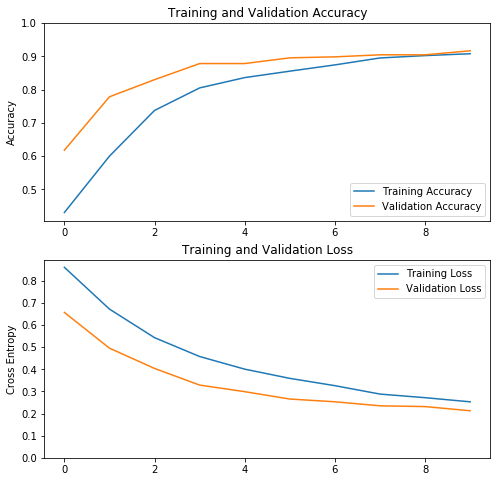

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

# Fine tuning

In [35]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False
    
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Number of layers in the base model:  155
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [36]:
history_fine = model.fit_generator(train_generator,
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs,
                                   workers=4,
                                   validation_data=validation_generator,
                                   validation_steps=validation_steps)

Epoch 1/10
62/62 [==============================] - 16s 253ms/step - loss: 0.1793 - acc: 0.9400 - val_loss: 0.1114 - val_acc: 0.9607
Epoch 2/10
62/62 [==============================] - 8s 129ms/step - loss: 0.0961 - acc: 0.9726 - val_loss: 0.0916 - val_acc: 0.9647
Epoch 3/10
62/62 [==============================] - 8s 130ms/step - loss: 0.0638 - acc: 0.9812 - val_loss: 0.0938 - val_acc: 0.9688
Epoch 4/10
62/62 [==============================] - 8s 132ms/step - loss: 0.0433 - acc: 0.9899 - val_loss: 0.0847 - val_acc: 0.9748
Epoch 5/10
62/62 [==============================] - 8s 131ms/step - loss: 0.0333 - acc: 0.9918 - val_loss: 0.0937 - val_acc: 0.9708
Epoch 6/10
62/62 [==============================] - 8s 130ms/step - loss: 0.0183 - acc: 0.9975 - val_loss: 0.1011 - val_acc: 0.9698
Epoch 7/10
62/62 [==============================] - 8s 131ms/step - loss: 0.0200 - acc: 0.9944 - val_loss: 0.0941 - val_acc: 0.9708
Epoch 8/10
62/62 [==============================] - 8s 133ms/step - loss: 0

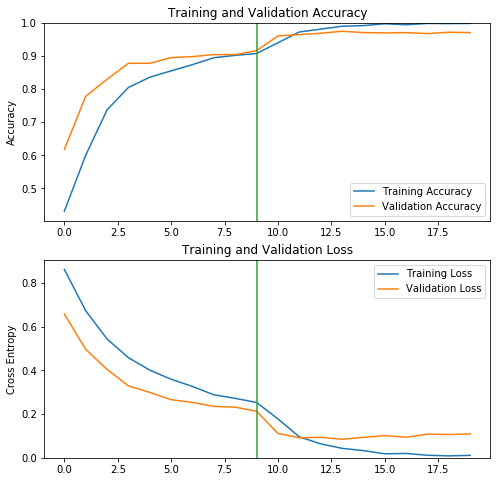

In [39]:
# acc += history_fine.history['acc']
# val_acc += history_fine.history['val_acc']

# loss += history_fine.history['loss']
# val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([0.9, 1])
plt.ylim([min(plt.ylim()),1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0, 0.2])
plt.ylim([0,max(plt.ylim())])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.title('Training and Validation Loss')
plt.show()